# Inżynieria cech i wstępne modelowanie
## Topic: School grades - Predict grades of school students based on lifestyle attributes


Adrianna Grudzień,\
Kinga Ułasik

## Wczytanie danych

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics, preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import xgboost as xg

In [ ]:
grades_org = pd.read_csv('school_grades_dataset.csv')
grades_org.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## Wytłumaczenie nazw kolumn

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

# Inżynieria cech
Chcemy, aby ze zgromadzonych danych dało się odczytać jak najwięcej informacji, dlatego przeprowadzamy:
* mapowanie (z danych nienumerycznych na numeryczne)
* kodowanie zmiennych kategorycznych (przy pomocy target encoding oraz one-hot encoding)
* normalizację (w celu pozbycia się rozbieżności w danych)

## Mapowanie i kodowanie zmiennych kategorycznych

In [ ]:
#mapowanie zmiennych binarnych
binary = {'yes':1, 'no':0}
grades = grades_org.copy(deep=True)
grades.schoolsup = grades_org.schoolsup.map(binary)
grades.famsup = grades_org.famsup.map(binary)
grades.paid= grades_org.paid.map(binary)
grades.activities = grades_org.activities.map(binary)
grades.nursery = grades_org.nursery.map(binary)
grades.higher = grades_org.higher.map(binary)
grades.internet = grades_org.internet.map(binary)
grades.romantic = grades_org.romantic.map(binary)

#mapowanie zmiennych przyjmujących tylko dwie wartości
sex_map = {'F':1, 'M':0}
grades.sex = grades_org.sex.map(sex_map)
pstatus_map = {'T':1, 'A':0}
grades.Pstatus = grades_org.Pstatus.map(pstatus_map)
address_map = {'U':1, 'R':0}
grades.address = grades_org.address.map(address_map)
famsize_map = {'LE3':1, 'GT3':0}
grades.famsize = grades_org.famsize.map(famsize_map)
school_map = {'GP':1, 'MS':0}
grades.school = grades_org.school.map(school_map)

#zobaczmy czy wszystko się właściwie zmapowało
grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,1,1,17,1,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,1,1,15,1,1,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,1,1,15,1,0,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,1,1,16,1,0,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


Aby pozbyć się wszystkich zmiennych kategorycznych zostosujemy One-Hot encoding dla kolumn Mjob, Fjob, reaason i guardian.

In [ ]:
#one hot encoding
kopia = grades.copy(deep=True)

grades_coded = pd.get_dummies(kopia.Mjob, sparse=True, drop_first=True)
grades_coded = grades_coded.rename(columns={'health': 'Mjob_health', 'other':'Mjob_other', 'services' : 'Mjob_services', 'teacher':'Mjob_teacher' })
grades = pd.concat([grades, grades_coded], axis=1)

grades_coded = pd.get_dummies(kopia.Fjob, sparse=True, drop_first=True)
grades_coded = grades_coded.rename(columns={'health': 'Fjob_health', 'other':'Fjob_other', 'services' : 'Fjob_services', 'teacher':'Fjob_teacher' })
grades = pd.concat([grades, grades_coded], axis=1)

grades_coded = pd.get_dummies(kopia.reason, sparse=True, drop_first=True)
grades_coded = grades_coded.rename(columns={'home': 'reason_home', 'reason':'reason_other', 'reason' : 'reason_reputation'})
grades = pd.concat([grades, grades_coded], axis=1)

grades_coded = pd.get_dummies(kopia.guardian, sparse=True, drop_first=True)
grades_coded = grades_coded.rename(columns={'mother': 'guardian_mother', 'other':'guardian_other'})
grades = pd.concat([grades, grades_coded], axis=1)

grades.drop(['Mjob', 'Fjob', 'reason', 'guardian' ], axis='columns', inplace=True)


grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,other,reputation,guardian_mother,guardian_other
0,1,1,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,1,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,15,1,1,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,0,0,0,0,0,1,0,0,0,1,0,1,0
3,1,1,15,1,0,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,1,0,0,0,0,0,1,0,1,0,0,1,0
4,1,1,16,1,0,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0,1,0,0,0,1,0,0,1,0,0,0,0


# Wybór zmiennych do modelowanie
W celu wybrania najbardziej optymalnego zbioru danych (kolumn), spójrzmy na wykres korelacji między zmiennymi. 

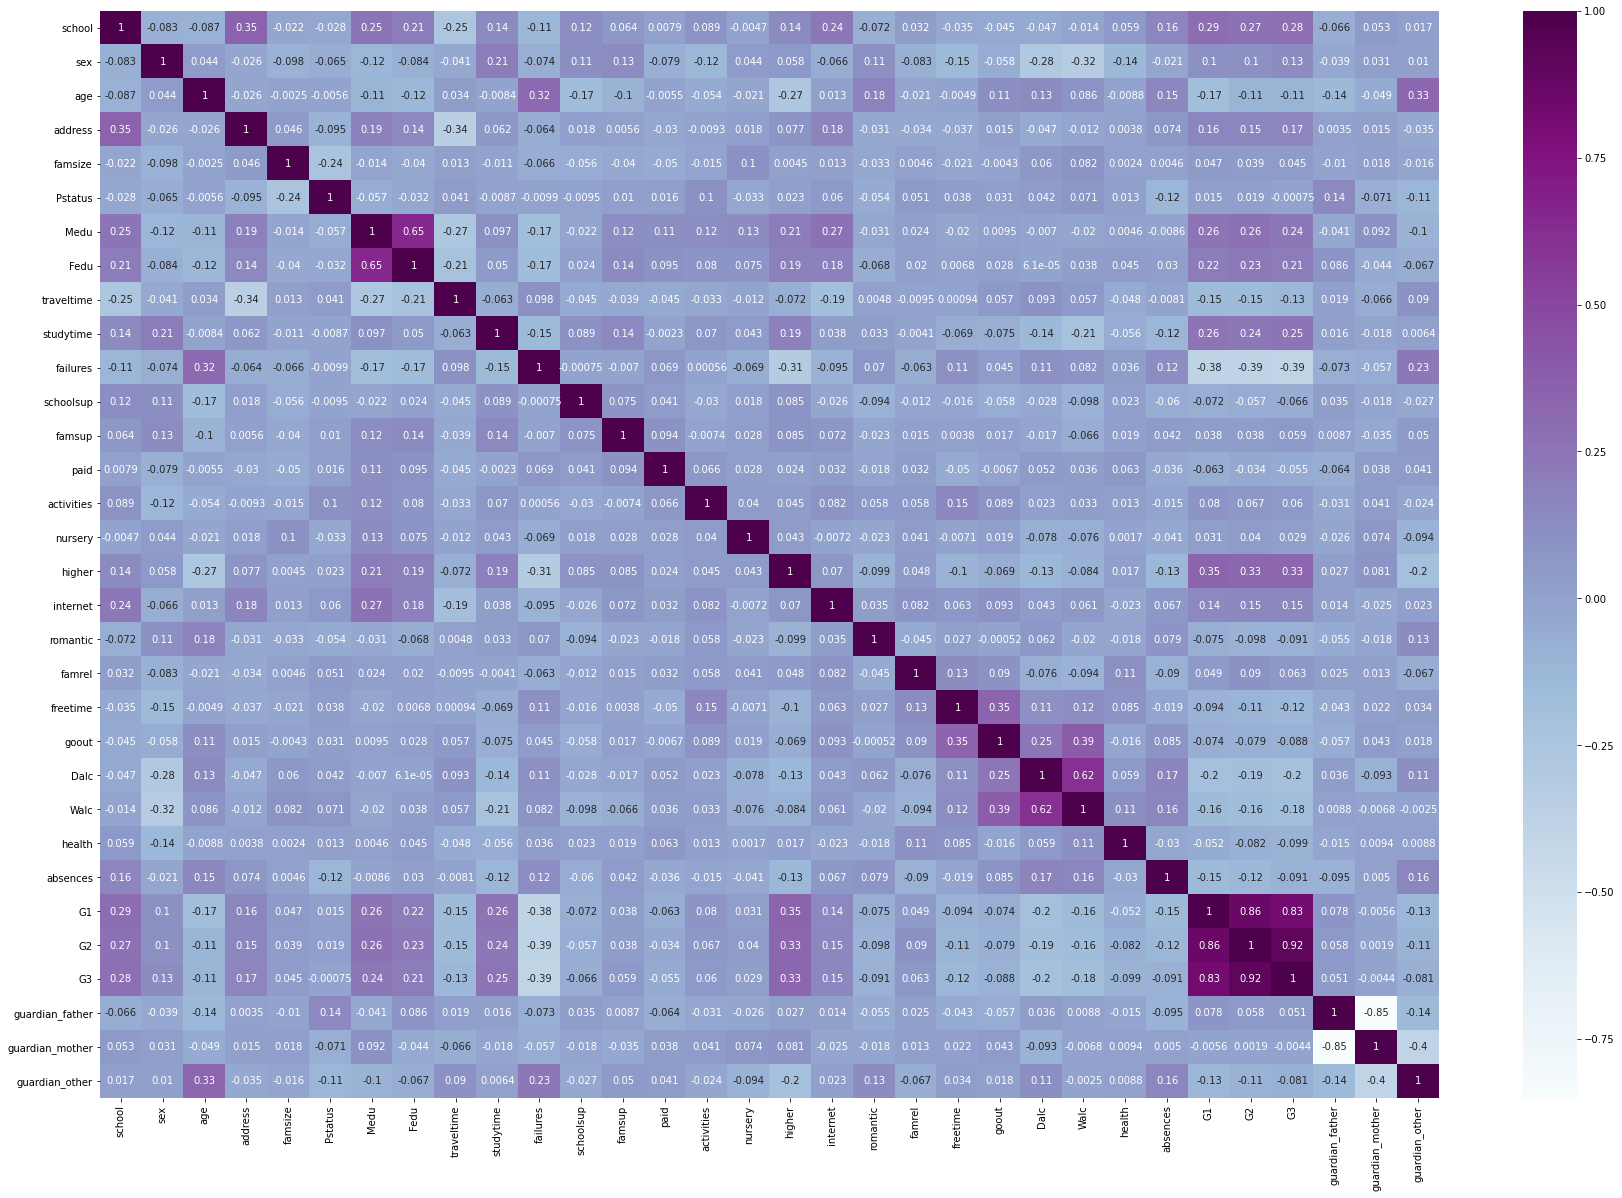

In [ ]:
plt.figure(figsize=(30,20))
plot = grades.corr()
sns.heatmap(plot, cmap = 'BuPu',annot=True)

<!-- Poprzez ,,mocno skorelowane'' w tym przypadku rozumiemy korelację o wartościach z przedziałów (-1, -0.2) oraz (0.2, 1).\
Z wykresu możemy odczytać, że ze zmienną docelową G3 mocno skorelowane są zmienne `G1`, `G2`, `higher`, `failures`, `studytime`, `Fedu`, `Medu` oraz `school`.\
Następnie patrzymy na zmienne skorelowane z tymi zmiennymi. Dzięki temu dostajemy dodatkowo zmienne `age` (skorelowane z failures), `sex` i `Walc` (skorelowane ze studytime), `traveltime` (skorelowane z Fedu), `internet` (skorelowane z Medu), `address` (skorelowane ze school).
I w następnym poziomie: `Dalc` (skorelowane z sex), `goout` (skorelowane z Walc).
I w jeszcze następnym poziomie: `freetime` (skorelowane z goout). -->

# Wstępne modelowanie
Regresja liniowa

W celu otrzymania powtarzalności, definiujemy funkcję liczącą błąd RMSE dla danego modelu `rmse`.

In [ ]:
# funkcja zwracająca błąd RMSE:
def rmse(X, Y=grades['G3'], random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
    y_pred = regressor.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', error)
    return error

def minimal_rmse(X, Y=grades['G3'], max_random_state=100):
    states = range(max_random_state) # wektor kolejnych wartości parametru random_state
    scores = [0] * len(states) # kolejne wartości na oś X
    for i in range(0, len(states)):
        scores[i] = rmse(X, Y, i)
    minimal = min(scores)
    print('Najmniejszy błąd otrzymujemy dla random_state = ', scores.index(minimal), ' i wynosi on ', minimal)
    return scores.index(minimal)

#funkcja zwracająca wartość R-squared
def r2(X, Y=grades['G3'], random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
    y_pred = regressor.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_set_r2 = r2_score(y_test, y_pred)
    print('R-squared:', test_set_r2)
    return test_set_r2


Wypróbowujemy błąd modelu w zależności od przyjętego zbioru X. Kolumny wybieramy spośród wybranych wcześniej zmiennych - tak, aby skuteczność modelu była najlepsza.

In [ ]:
# im więcej zmiennych, tym coraz lepsze wyniki
rmse(grades[['G1','G2']])
rmse(grades[['G1','G2', 'failures']])
rmse(grades[['G1','G2', 'failures', 'higher']])
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime']])
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school']]) 
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age']])
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age', 'goout']]) 
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age', 'goout', 'freetime']])
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age', 'goout', 'freetime', 'Dalc']]) # najlepszy wynik!!!
#policzmy jeszcze R2 score
r2(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age', 'goout', 'freetime', 'Dalc']])


print()
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'Fedu']]) # odtąd już się psuje
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'Medu']])
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'Fedu', 'Medu']]) # lepsze od poprzedniego, ciekawe

Root Mean Squared Error: 0.99283919515098
Root Mean Squared Error: 0.9928204615242413
Root Mean Squared Error: 0.9896637185858872
Root Mean Squared Error: 0.987345570832935
Root Mean Squared Error: 0.9835121050613355
Root Mean Squared Error: 0.9795347448248964
Root Mean Squared Error: 0.9778721716831051
Root Mean Squared Error: 0.9749465707702083
Root Mean Squared Error: 0.9732349517944905
R-squared: 0.8666668222615632

Root Mean Squared Error: 0.9899200275947792
Root Mean Squared Error: 0.9943229679434504
Root Mean Squared Error: 0.9941881662603058


0.9941881662603058

Dodatkowo, w opisie zadania jest powiedziane, że przewidywanie wartości G3 bez wartości G1 i G2 jest dużo cięższe jednak na pewno bardzie przydatne oraz 'życiowe'. Spróbowałyśmy stworzyć i taki model, który (jak można było się domyślać) nie dawał sobie tak dobrze rady jak poprzedni, ale było to możliwe.

In [ ]:
rmse(grades[['school','studytime','failures','health','absences','schoolsup','paid','romantic','address','Fedu']])
r2(grades[['school','studytime','failures','health','absences','schoolsup','paid','romantic','address','Fedu']])
#najniższy rmse jaki byłyśmy w stanie otrzymać wynosił około 2.178

Root Mean Squared Error: 2.178158589091377
R-squared: 0.33214554222171433


0.33214554222171433

# Normalizacja
W tej sekcji sprawdzimy jak normalizacja danych wpływa na błąd RMSE modelu.



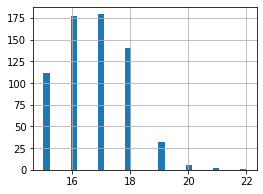

In [ ]:
grades['age'].hist(figsize=(4, 3), bins=30)
plt.show()

In [ ]:
grades_normalised = grades.copy(deep=True)
grades_normalised['age'] = np.log2(grades_normalised['age']) # wiek normalizujemy logarytmicznie - dzięki temu błąd jest jeszcze mniejszy

print('PRZED normalizacją:')
rmse(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age', 'goout', 'freetime', 'Dalc']]) 
r2(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age', 'goout', 'freetime', 'Dalc']]) 
print('PO normalizacji:')
rmse(grades_normalised[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age', 'goout', 
                        'freetime', 'Dalc']])
r2(grades_normalised[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age', 'goout', 
                        'freetime', 'Dalc']]) 

PRZED normalizacją:
Root Mean Squared Error: 0.9732349517944905
R-squared: 0.8666668222615632
PO normalizacji:
Root Mean Squared Error: 0.9727333142228294
R-squared: 0.8668042355224069


0.8668042355224069

To samo zastosujmy do modelu nie zawierającego zmiennych G2 i G2

In [ ]:
grades_normalised['health'] = preprocessing.normalize([grades_normalised['health']])[0]
grades_normalised['absences'] = preprocessing.normalize([grades_normalised['absences']])[0]
grades_normalised['Fedu'] = preprocessing.normalize([grades_normalised['Fedu']])[0]

print('PRZED normalizacją')
rmse(grades[['school','studytime','failures','health','absences','schoolsup','paid','romantic','address','Fedu']])
r2(grades[['school','studytime','failures','health','absences','schoolsup','paid','romantic','address','Fedu']])
print('PO normalizacji')
rmse(grades_normalised[['school','studytime','failures','health','absences','schoolsup','paid','romantic','address','Fedu']])
r2(grades_normalised[['school','studytime','failures','health','absences','schoolsup','paid','romantic','address','Fedu']])


PRZED normalizacją
Root Mean Squared Error: 2.178158589091377
R-squared: 0.33214554222171433
PO normalizacji
Root Mean Squared Error: 2.178158589091375
R-squared: 0.3321455422217152


0.3321455422217152

Różnica błędów jest bardzo mała, więc trzeba się zastanowić, czy normalizacja danych na pewno jest konieczna.

## Czy zadanie z regresji może byc zadaniem z klasyfikacji?
Dodatkowo przygotowałyśmy model, który zadanie przewidywania wyniku końcowego uczniów traktuje jako zadanie z klasyfikacji, zamiast z regresji. Mamy więc 20 klas (ilość punktów na egzaminie) i sprawdzamy, czy taki model daje sobie radę lepiej niż model regresji.

In [ ]:
#klasyfikacja
from sklearn.linear_model import LogisticRegression

def rmse_categorised(X, y=grades['G3'], random_state=0):
  logreg_clf = LogisticRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
  logreg_clf.fit(X_train, y_train)
  y_pred = logreg_clf.predict(X_test)
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
rmse_categorised(grades[['G1','G2', 'failures', 'higher', 'studytime', 'school', 'age', 'goout', 'freetime', 'Dalc']])

Root Mean Squared Error: 1.7715703594442809


1.7715703594442809

Jak widać, RMSE, w porównaniu do rozwiązywania problemu za pomocą regresji, wychodzi dużo większy.